In [1]:
import pandas as pd

In [2]:
from pandas.tools.plotting import scatter_matrix

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [4]:
df = pd.read_csv(url)

Look at the data

In [5]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Column names (attributes) are not mentioned. Let's do that first.

In [7]:
df.columns = ['sepal_length(cm)', 'sepal_width(cm)', 'petal_length(cm)', 'petal_width(cm)', 'Class']

In [8]:
df.head()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


 Great. Now let's visualize the data. A univariate plot helps us to understand each attribute better. A multivariate plot helps us understand relationship between attributes. Let's do that one by one

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

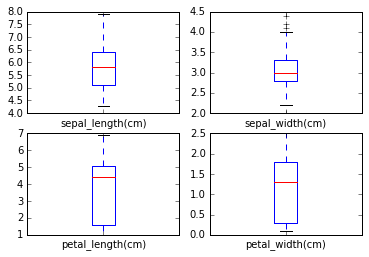

In [10]:
df.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

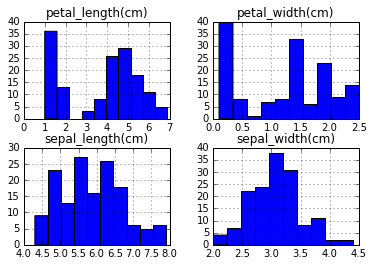

In [11]:
df.hist()
plt.show()

Observe that sepal_width and sepal_length have near Gaussian distributions. This gives us clues as to how to model the data.

Now let's see a multivariate plot to understand the relationship between variables

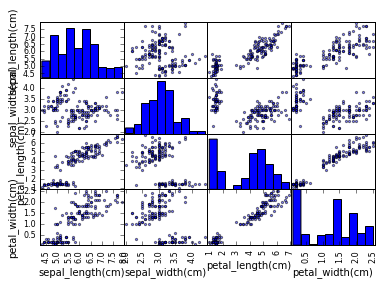

In [12]:
scatter_matrix(df)
plt.show()

This diagonal formation tells us that the features have strong correlation. Nothing to worry about, then

Now we will evalate a few popular classifiers. We will cross validate the data and train each classifier on it, obtaining accuracy of each. We will then use them to predict new data.
To achieve this, we start by splitting the data into training and test sets.

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

We have our data in the form of a dataframe. We need to parse df in order to obtain X and Y. Let's do that

In [15]:
from sklearn.cross_validation import train_test_split

In [66]:
X, y = df.iloc[:, 0:4].values, df.iloc[:, 4].values

In [67]:
X.shape

(149, 4)

In [92]:
X 

array([[ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4.8,  3.1,  1.6,  0.2],
       [ 5

In [102]:
y = y.ravel()

In [104]:
y.shape

(149,)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

We have our training and testing set. Now let's create our model classifiers and append them to a list. 

In [106]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))

            

In [107]:
results = []
names = []

Define a few parameters which will be needed for cross validation

In [108]:
num_instances = len(X_train)
seed = 7
num_folds = 10
scoring = 'accuracy'

In [109]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score as cvs

In [111]:
for name, model in models:
    kfold = KFold(n = num_instances, n_folds = num_folds, random_state = seed)
    cv_result = cvs(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append((cv_result))
    names.append((name))
    print "%s: %f (%f)" %(name, cv_result.mean(), cv_result.std()) # Print each classifier accuracy (average) along with s
                                                                    #standard deviation

LR: 0.940909 (0.053761)
DT: 0.966667 (0.055277)
LDA: 0.983333 (0.033333)
GaussianNB: 0.975000 (0.053359)
SVM: 0.975000 (0.038188)
KNN: 0.975000 (0.053359)


As we can see, our linear discriminant Analyzer returns highest cross val accuracy. We will use this to make our predictions

In [112]:
lda = LinearDiscriminantAnalysis()

In [113]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
prediction = lda.predict(X_test) #Now feed the test data to the trained classifer and get predictions

In [117]:
accuracy_score(y_test, prediction) #Get the number of correctly classified cases

0.96666666666666667

Good show! Training and testing accuracy are quite high, and more importantly, close to each other. This tells us our 
model worked well. Let's plot our training accuracy and validation accuracy as a result. We should see positive 
results.

In [120]:
import numpy as np

In [124]:
from sklearn.learning_curve import learning_curve

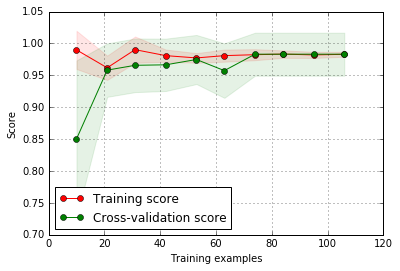

In [125]:
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(estimator = LinearDiscriminantAnalysis(),
                                                        X = X_train, y = y_train , cv = num_folds,
                                                        train_sizes = np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

This is pretty good. The curves touch each other at multiple points, and on average are quite close to each other, 
indicating under/overfitting is not taking place

In conclusion, we worked on Fischer's classic 1930s dataset, visualized it, pre-processed it, and fit half a dozen classifiers through it.
Our results show that on the Iris data set at least, Linear Discriminant Analysis (not to be confused with LDA), performs the best on the data, achieving a training accuracy of a little over 98%. It's performance on the testing data was sound as well, amounting to 96.67%, with accuracy being the performance metric. 
This indicates a good model.

Data source --- UCI Machine learning respository (Iris data set)

Package Versions used have been noted below:

In [128]:
import numpy
import matplotlib
import pandas
import sklearn
print "numpy: {}".format(numpy.__version__)
print "matplotlib: {}".format(matplotlib.__version__)
print "pandas: {}".format(pandas.__version__)
print "sklearn: {}".format(sklearn.__version__)

numpy: 1.11.1
matplotlib: 1.5.1
pandas: 0.18.1
sklearn: 0.17.1
